<a href="https://colab.research.google.com/github/radicalcoder/ML-Project/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import skimage
import skimage.data
import skimage.transform
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from keras import models
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
import keras
import PIL
from skimage import io
from skimage import color
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout


# To read the data directory from repository on github.
%matplotlib inline
!git clone -l -s https://github.com/radicalcoder/ML-Project.git data
%cd data
!ls

Using TensorFlow backend.


Cloning into 'data'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 7397 (delta 29), reused 0 (delta 0), pack-reused 7349
Receiving objects: 100% (7397/7397), 247.13 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Checking out files: 100% (7225/7225), done.
/content/data
BelgiumTSC_Testing   MLP_final_initialdraft.ipynb  README.md
BelgiumTSC_Training  MLP.ipynb			   traffic.py


In [0]:
def data_loader(data_dir):
    """
    The data set is read into two lists, as follows:
    list labels[] -> a list of numbers, where each number represents a unique image label.
    list images[] -> a list of arrays, where each array represents a single image.
    
    The data set directory contains multiple subdirectories. We read all these 
    subdirectories into a list subdirs[]. Since the subfolders are read in a random order, the list
    is also in a random order. We then sort this array using the sort() function.
    """
    
    subdirs = []
    for i in os.listdir(data_dir):
      if os.path.isdir(data_dir + i):   # There may be .txt files in the data_dir hence we need to check
        subdirs.append(i)

    subdirs.sort()
    
    """
    Data is now collected into two lists - labels & images - while looping through the 
    list subdirs[].    
    """

    labels = []
    images = []
    for i in subdirs:
        label_dir = data_dir + i
        #print(label_dir)
        f_names=[]
        for f in os.listdir(label_dir):
          if f.endswith(".ppm"):   # only files that end in .ppm are image files
            f_names.append(label_dir + '/' + f)
        # print(f_names)
        """
        Now for each label, append all its images into the list images[] and 
        append its label number in the list labels[]. 
        """
        
        for f in f_names:
            images.append(skimage.data.imread(f))   #use parameter as_grey??
            labels.append(int(i))
    return labels, images


# Loading the training and testing dataset using the function data_loader().
training_data_dir = "BelgiumTSC_Training/Training/"
testing_data_dir = "BelgiumTSC_Testing/Testing/"

labels, images = data_loader(training_data_dir)
#print(labels)

In [3]:
print("No of unique Labels: ", len(set(labels)), "\nTotal number of Images: ", len(images)) 

No of unique Labels:  62 
Total number of Images:  4575


In [0]:
def display_images_and_labels(images, labels):
    #Display the first image of each label.
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image,cmap="gray")
    plt.show()


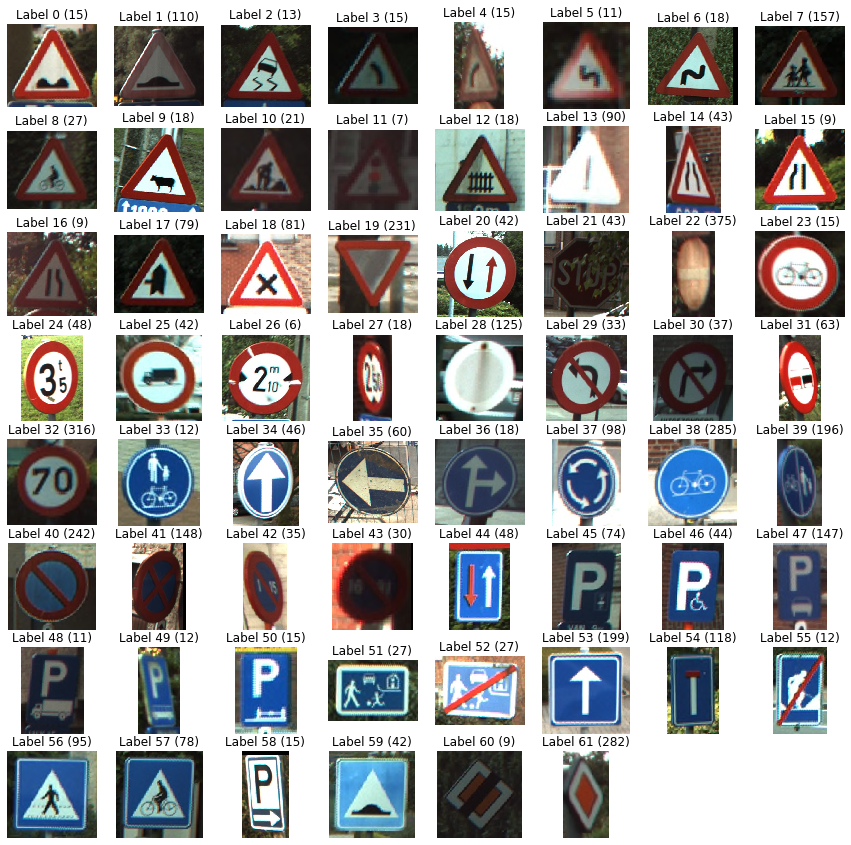

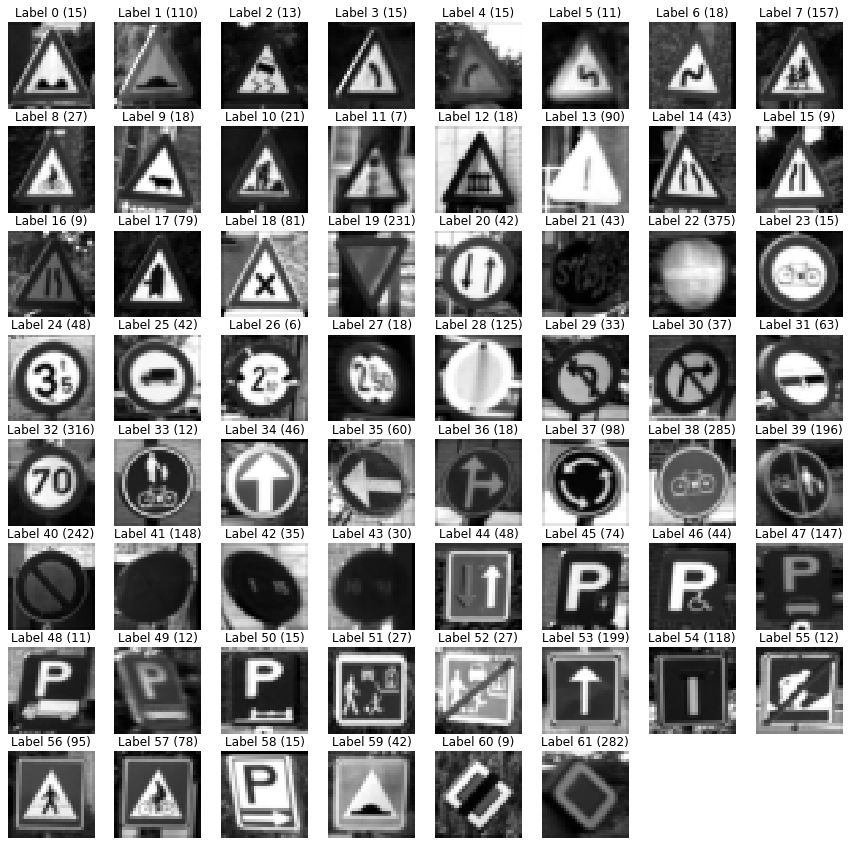

Grayscale images
4575
shape: (32, 32), min: 0.08918357421875, max: 0.9128336519607844
shape: (32, 32), min: 0.054898770105698505, max: 0.9739451960784319
shape: (32, 32), min: 0.05186206868489584, max: 0.9951316237745098
shape: (32, 32), min: 0.011294590226715995, max: 0.8266693114276962
shape: (32, 32), min: 0.07370136335784315, max: 0.8950602941176472
shape: (32, 32), min: 0.0488201394952512, max: 0.911336868872549
shape: (32, 32), min: 0.052944715073529366, max: 0.9952450980392157
shape: (32, 32), min: 0.0721100235523897, max: 0.9055836569393383
shape: (32, 32), min: 0.05361254901960762, max: 0.996078431372549
shape: (32, 32), min: 0.04544354166666667, max: 0.6664398580154718
shape: (32, 32), min: 0.12471631127450947, max: 0.9959773720894608
shape: (32, 32), min: 0.09544324295343169, max: 0.996078431372549
shape: (32, 32), min: 0.06889145009957118, max: 0.9915034355851715
shape: (32, 32), min: 0.058104031671262185, max: 0.9928301303998162
shape: (32, 32), min: 0.024818349705116323, 

In [9]:
reshape_images=[]
grayscale_images=[]
for i in images:
  reshape_images.append(skimage.transform.resize(i,(32,32), mode ='constant'))
  
for i in reshape_images:
  grayscale_images.append(color.rgb2gray(i))

display_images_and_labels(images,labels)
display_images_and_labels(grayscale_images, labels)

print("Grayscale images")
print(len(grayscale_images))
for i in grayscale_images[:20]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped images")

for i in reshape_images[:20]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))